<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Mohammad Ali Olama
### Student Number : 98100497
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [2]:
#TODO
from sklearn.model_selection import train_test_split

df = pd.read_csv("heart_disease.csv")



# Convert classes in target variable to {-1, 1}
df['target'] = 2 * df['target'] -1

# Train - test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'target'), 
                                                    df['target'], 
                                                    test_size=0.25, 
                                                    random_state = 2) 

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,-1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,-1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,-1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,-1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,-1


### Adaboost Algorithm Implementation (40 points)

In [3]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.    
    error = 0
    pred_status = 1 - np.equal(y , y_pred).astype(int)          # 0 if equal , 1 if not
    error = np.dot(w , pred_status)
    return error / sum(w)
    

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return np.log((1 - error) / error)

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    
    pred_status = 1 - np.equal(y , y_pred).astype(int)        # 0 if equal , 1 if not
            
    return w * np.exp(alpha * (pred_status))

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M
        alpha = 0
        for m in range(0, M):
            
            # Set weights
            if m == 0:
                #TODO
                 w = np.ones(len(y)) / len(y)  # At m = 0, weights are equal to 1 / N
                 
            else:
                #TODO
                w = update_weights(w, alpha, y, y_pred)

            
            G_m = DecisionTreeClassifier(max_depth = 1)
            G_m.fit(X, y, sample_weight = w)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) 


            
            error = calculate_error(y, y_pred, w)
            self.training_errors.append(error)


            
            alpha = calculate_alpha(error)
            self.alphas.append(alpha)
            



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m
        
        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

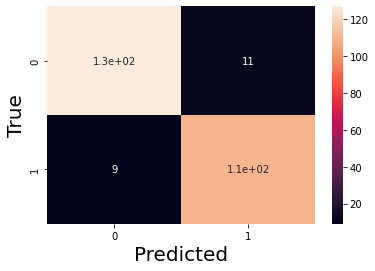

              precision    recall  f1-score   support

          -1       0.93      0.92      0.93       138
           1       0.91      0.92      0.92       119

    accuracy                           0.92       257
   macro avg       0.92      0.92      0.92       257
weighted avg       0.92      0.92      0.92       257



In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report ,precision_recall_curve,roc_curve, roc_auc_score,auc,classification_report,confusion_matrix


#TODO : Fit model

ab = AdaBoost()
ab.fit(X_train, y_train, M = 400)

#TODO : Predict on test data
y_pred = ab.predict(X_test)


#TODO : Print evaluation metrics (Accurcy, Precission, Recall and f-score)

conf_mx = confusion_matrix(y_test, y_pred)

fig = plt.figure()
ax= plt.subplot()
sns.heatmap(conf_mx, annot=True);
ax.set_xlabel('Predicted', fontsize=20)
ax.set_ylabel('True', fontsize=20)

plt.show()

print(classification_report(y_test, y_pred))



0.9221789883268483


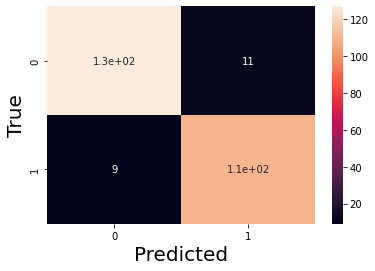

              precision    recall  f1-score   support

          -1       0.93      0.92      0.93       138
           1       0.91      0.92      0.92       119

    accuracy                           0.92       257
   macro avg       0.92      0.92      0.92       257
weighted avg       0.92      0.92      0.92       257



In [5]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=400, algorithm="SAMME", learning_rate=1)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

conf_mx = confusion_matrix(y_test, y_pred)

fig = plt.figure()
ax= plt.subplot()
sns.heatmap(conf_mx, annot=True);
ax.set_xlabel('Predicted', fontsize=20)
ax.set_ylabel('True', fontsize=20)

plt.show()

print(classification_report(y_test, y_pred))


### Early Stopping (15 points)

In [6]:
#TODO : Calculate validation error for different number of estimators 

from sklearn.metrics import mean_squared_error
result={}

for count_of_estimators in range(1, 400):
    ad = AdaBoostClassifier( n_estimators=count_of_estimators)
    ad.fit(X_train , y_train)
    y_pred = ad.predict(X_test)
    val_error = mean_squared_error(y_test , y_pred)
    result[count_of_estimators] = val_error;

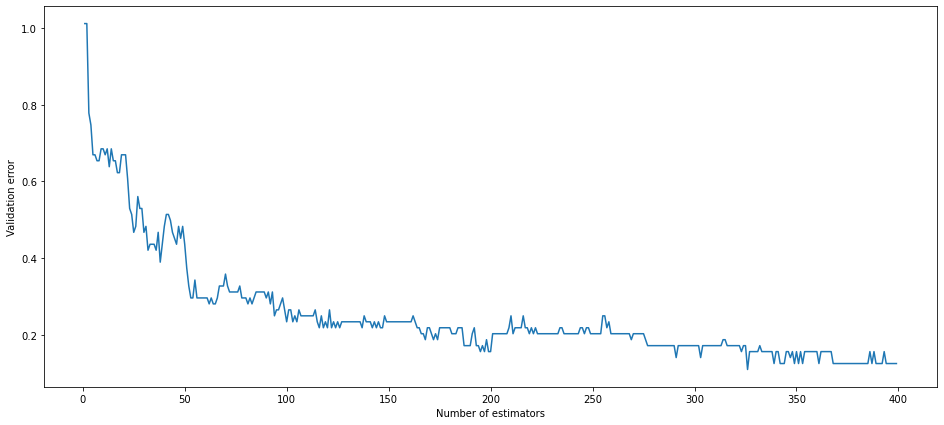

In [7]:
#TODO : Plot validation error versus number of estimators figure.

plt.figure(figsize=(16, 7))
ax = sns.lineplot(x=list(result.keys()), y=list(result.values()))
plt.xlabel("Number of estimators")
plt.ylabel("Validation error")
plt.show()

In [8]:
#TODO : Print the best number for estimators and minimum value for validation error.
from operator import itemgetter
index, element = min(enumerate(result.values()), key=itemgetter(1))

print("The best number for estimators is: "+ str(index +1 ))
print("The minimum value for validation error is: "+ str(element))

The best number for estimators is: 326
The minimum value for validation error is: 0.10894941634241245


### Weighted Error (10 points)

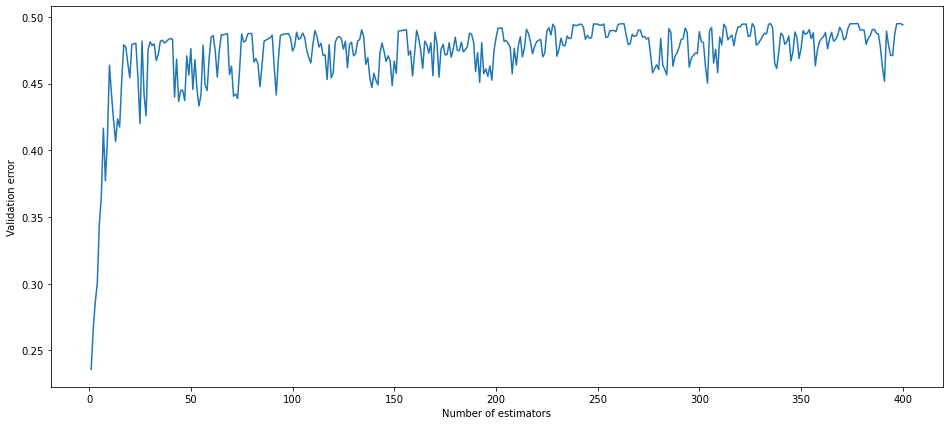

In [9]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
plt.figure(figsize=(16, 7))
ax = sns.lineplot(x=list(range(1,401)), y=list(ab.training_errors))
plt.xlabel("Number of estimators")
plt.ylabel("Validation error")
plt.show()


### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

The weights for missclassified samples tend to increase. so when number of estimators inccrease , There is more chance for a sample to be missclassified during procedure, so the weighted error will increase.